https://ibiblio.org/e-notes/Perc/xy.htm#:~:text=Eij%20%3D%20


In [1]:
import xygame as xg
import time as tm
import numpy as np
import matplotlib.pyplot as plt
import math
# %config InlineBackend.figure_formats = ['svg']
# %matplotlib inline

In [2]:
start_time = tm.time()

rows = 20
cols = 20
beta = 2
J = 1
time = 1

In [3]:
lattice = xg.field_generator(rows,cols)
b_field = xg.field_generator(rows,cols, left_most=0, right_most=0)
model = xg.full_model(lattice=lattice, B_field=b_field, beta=beta, time=time, J=J)

In [4]:
images = [lattice.copy()]
total_energy_list = [xg.get_net_energy(model)]
total_spin_list = [xg.get_net_spin(model)]
avg_energy_list = [xg.get_avg_energy(model)]
avg_M_list = [xg.get_avg_M(model)]

In [5]:
time = 30000
for i in range(time):
    xg.metropolis(model)
    if (i % int(time/10) == 0):
        images.append(model.lattice.copy())
        total_energy_list.append(xg.get_net_energy(model))
        total_spin_list.append(xg.get_net_spin(model))
        avg_energy_list.append(xg.get_avg_energy(model))
        avg_M_list.append(xg.get_avg_M(model))

In [6]:
xg.display_xy_sequence(images)

interactive(children=(IntSlider(value=5, description='frame', max=10), Output()), _dom_classes=('widget-intera…

<function xygame.display_xy_sequence.<locals>._show(frame=(0, 10))>

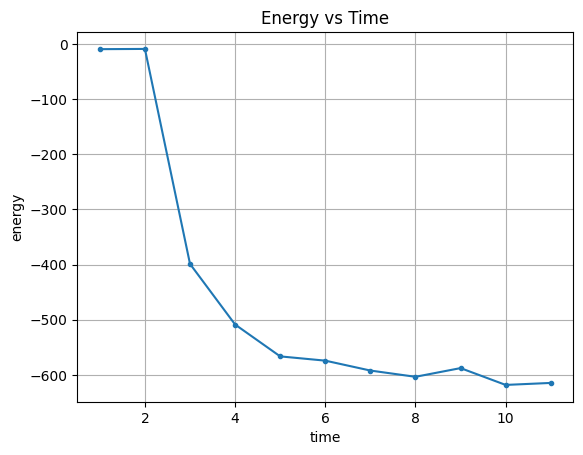

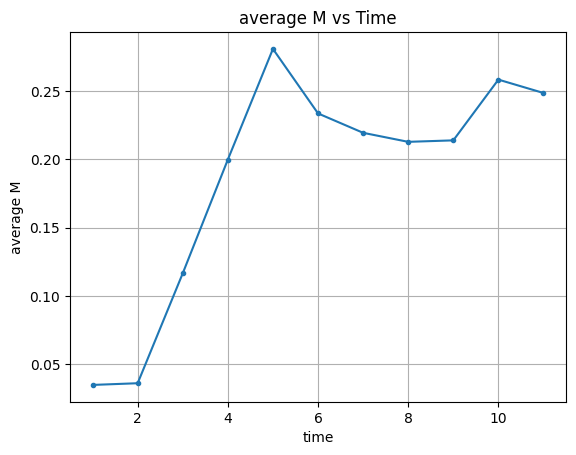

In [7]:
xg.graph_list(total_energy_list, "time", "energy", "Energy vs Time")
xg.graph_list(avg_M_list, "time", "average M", "average M vs Time")

In [8]:
# xg.display_xy_sequence_html(images, folder_file_name = "my_frame/animation.html")
# xg.export_mp4(image_folder_name = "my_frame/animation_frames", output_file_name="my_animation", frame_rate=48)

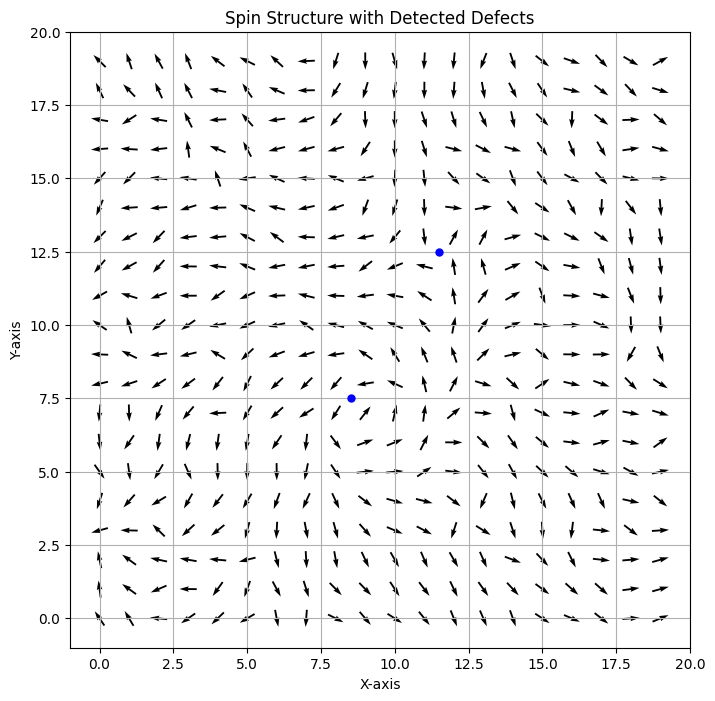

In [9]:
# first way
defects = xg.detect_defects(lattice)

# second way
defects_part_2 = xg.detect_defects_part_2(lattice)

# Plot the spin structure and the detected defects
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
U = np.cos(lattice)
V = np.sin(lattice)

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, pivot='mid')
for (x, y) in defects:
    plt.plot(x, y, 'ro' if x % 2 == 0 else 'bo', markersize=5)  # red for vortices, blue for antivortices with small marker
for (x, y) in defects_part_2:
    plt.plot(x, y, 'ko' if x % 2 == 0 else 'go', markersize=1)  # red for vortices, blue for antivortices with small marker
plt.xlim(-1, cols)
plt.ylim(-1, rows)
plt.title('Spin Structure with Detected Defects')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()

In [10]:
end_time = tm.time()
total_time = end_time - start_time
print(f"Total time taken to run the notebook: {total_time} seconds")


Total time taken to run the notebook: 2.0409507751464844 seconds
